# Code to retrieve a wandb artifact

In [1]:
import sys
sys.path.append('..')


import wandb
import yaml
import pickle
import tempfile
from src.utils import process_results
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os

with open('../wandb.yaml') as file:
    wandb_data = yaml.load(file, Loader=yaml.FullLoader)

os.environ["WANDB_API_KEY"] = wandb_data['wandb_key'] 
wandb_entity = str(wandb_data['wandb_entity'])


In [2]:
# set the wandb project name
project_name = 'ssl_dcai_dips_free'

dataset_results = {}

sweeps = [('seer', '1.0'), ('adult', '0.66'), ('cutract', '1.0'), ('covid', '0.66'),   ('maggic', '0.66'), ("compas", "1.0"), ("agaricus-lepiota", '1.0'), ('German-credit', '1.0'), ("higgs", "0.1"),   ('drug', '0.1'), ("blog", "0.2"),("credit", "1.0")]

try:
    results_dfs = []
    metainfo_list = []
    for sweep in tqdm(sweeps):

        prop_data = sweep[1]
        dataset_name = sweep[0]
        numTrials = 10
        seed = 0
        data_iq_xthresh = "0.0"

        
        min_list = []
        max_list = []

        # load the 10 runs for each starting seed
        for idx, seed in enumerate([0,10, 42, 100,1000]):
            try:
                temp_dir = tempfile.TemporaryDirectory()

                if idx == 0:
                    metainfo = f"{dataset_name}_{prop_data}_{data_iq_xthresh}_{numTrials}_{seed}"
                    metainfo_list.append(metainfo)

                api = wandb.Api()
                artifact = api.artifact(f'{wandb_entity}/{project_name}/results_dict_{metainfo}:latest', type='pickle')
                artifact_dir = artifact.download(root=temp_dir.name)


                with open(artifact_dir + f"/results_dict_{metainfo}.pkl", "rb") as f:
                    new_data = pickle.load(f)
                temp_dir.cleanup()


                if idx==0:
                   data = new_data
                else:
                    data += new_data
          
            except Exception as e:
                print(e)
                continue # in case a file hasn't run yet


        print(f"Loaded {dataset_name}")
        results = process_results(results_list=data,numIters=5, end_score=True)
 
        results_dfs.append(results)


except Exception as e:
    import traceback
    print(traceback.print_exc())
    pass

  0%|          | 0/12 [00:00<?, ?it/s]

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
  8%|▊         | 1/12 [00:04<00:51,  4.71s/it]

Loaded seer


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
 17%|█▋        | 2/12 [00:09<00:47,  4.74s/it]

Loaded adult


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
 25%|██▌       | 3/12 [00:14<00:43,  4.78s/it]

Loaded cutract


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
 33%|███▎      | 4/12 [00:19<00:38,  4.76s/it]

Loaded covid


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
 42%|████▏     | 5/12 [00:23<00:33,  4.79s/it]

Loaded maggic


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
 50%|█████     | 6/12 [00:28<00:28,  4.75s/it]

Loaded compas


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
 58%|█████▊    | 7/12 [00:33<00:23,  4.76s/it]

Loaded agaricus-lepiota


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
 67%|██████▋   | 8/12 [00:38<00:20,  5.03s/it]

Loaded German-credit


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
 75%|███████▌  | 9/12 [00:44<00:15,  5.09s/it]

Loaded higgs


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
 83%|████████▎ | 10/12 [00:48<00:10,  5.01s/it]

Loaded drug


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
 92%|█████████▏| 11/12 [00:53<00:04,  4.92s/it]

Loaded blog


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
100%|██████████| 12/12 [00:58<00:00,  4.86s/it]

Loaded credit


In [4]:

def plot_results(results_dfs, metainfo_list):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.style.use('seaborn-whitegrid')

    shift = int(len(results_dfs)/2)

    fig, axs = plt.subplots(nrows=2, ncols=len(results_dfs)-shift, figsize=(50, 10))

    var_dict = {}
    std_dict = {}
    
    for i, df in enumerate(results_dfs):
        
        if i>shift-1:
            ax = axs[1, i-shift]
        else:
            ax = axs[0, i]
    
        data = df

        # Indices for the bar plot
        width = 0.15

        # Extract the means and standard errors for each method
        supervised_mean = data['supervised_learning_accuracy']['acc_mean']
        supervised_se = data['supervised_learning_accuracy']['acc_se']

        # extract mean and se for fully_supervised_learning_accuracy"
        fully_supervised_mean = data['fully_supervised_learning_accuracy']['acc_mean']
        fully_supervised_se = data['fully_supervised_learning_accuracy']['acc_se']

        # ups
        ups_vanilla_mean = data['ups']['vanilla_mean']
        ups_vanilla_se = data['ups']['vanilla_se']
        ups_dips_full_mean = data['ups']['dips_full_mean']
        ups_dips_full_se = data['ups']['dips_full_se']

        # pseudo
        pseudo_vanilla_mean = data['pseudo']['vanilla_mean']
        pseudo_vanilla_se = data['pseudo']['vanilla_se']
        pseudo_dips_full_mean = data['pseudo']['dips_full_mean']
        pseudo_dips_full_se = data['pseudo']['dips_full_se']

        # flex
        flex_vanilla_mean = data['flex']['vanilla_mean']
        flex_vanilla_se = data['flex']['vanilla_se']
        flex_dips_full_mean = data['flex']['dips_full_mean']
        flex_dips_full_se = data['flex']['dips_full_se']

        # sla
        sla_vanilla_mean = data['sla']['vanilla_mean']
        sla_vanilla_se = data['sla']['vanilla_se']
        sla_dips_full_mean = data['sla']['dips_full_mean']
        sla_dips_full_se = data['sla']['dips_full_se']

        # csa
        csa_vanilla_mean = data['csa']['vanilla_mean']
        csa_vanilla_se = data['csa']['vanilla_se']
        csa_dips_full_mean = data['csa']['dips_full_mean']
        csa_dips_full_se = data['csa']['dips_full_se']

        vanilla_means = [pseudo_vanilla_mean, ups_vanilla_mean,  flex_vanilla_mean, sla_vanilla_mean, csa_vanilla_mean]
        vanilla_se = [pseudo_vanilla_se,  ups_vanilla_se,  flex_vanilla_se, sla_vanilla_se, csa_vanilla_se]

        dips_full_means = [pseudo_dips_full_mean, ups_dips_full_mean, flex_dips_full_mean, sla_dips_full_mean, csa_dips_full_mean]
        dips_full_se = [pseudo_dips_full_se, ups_dips_full_se,  flex_dips_full_se,   sla_dips_full_se, csa_dips_full_se]
        #rects2 = ax.bar(ind + width/2, dips_full_means, width, yerr=dips_full_se, label='dips Full')

        var_dict[metainfo_list[i].split("_")[0]] = {
            "vanilla": np.var(vanilla_means),
            "dips_full": np.var(dips_full_means)
        }

        std_dict[metainfo_list[i].split("_")[0]] = {
            "vanilla": np.std(vanilla_means),
            "dips_full": np.std(dips_full_means)
        }

        supervised_means = [supervised_mean] * len(vanilla_means)
        supervised_se = [supervised_se] * len(vanilla_se)


        ind = np.arange(len(vanilla_means))* 0.75

        supervised_color = '#F2B701' #yellow
        vanilla_color =  '#80BA5A' #green 
        dips_color = '#E73F74' #red

        rects0 = ax.bar(ind - 3*width/2, supervised_means, width, yerr = supervised_se,label='Supervised', color=supervised_color, alpha=1,edgecolor='w', linewidth=1)

        rects1 = ax.bar(ind - width/2, vanilla_means, width, yerr = vanilla_se , label='Vanilla', color=vanilla_color, alpha=1, edgecolor='w',linewidth=1)
        rects2 = ax.bar(ind + width/2, dips_full_means, width, yerr=dips_full_se, label='DIPS (Ours)', color=dips_color, edgecolor='w', linewidth=1)
        
        # add fully supervised results as a bar
        #rects3 = ax.bar(ind + 3*width/2, fully_supervised_mean, width, yerr=fully_supervised_se, label='Fully Supervised', color='y', edgecolor="k",)

        fontsize = 40
        # Add some text for labels, title, and custom x-axis tick labels
        if i==0 or i==6:
            ax.set_ylabel('Accuracy', fontsize=fontsize)
        ax.set_title('Accuracy by Method and Group')
        ax.set_xticks(ind)
        ax.set_xticklabels(('PL', 'UPS',  'Flex', 'SLA', 'CSA'))
        
        ax.tick_params(axis="both", which="major", labelsize=fontsize)

        # remove vertical grid lines
        ax.grid(axis='x')

        # Calculate min and max values with a margin
        min_value = np.min(vanilla_means + dips_full_means) - np.max(vanilla_se + dips_full_se)-1 
        max_value = np.max(vanilla_means + dips_full_means) + np.max(vanilla_se + dips_full_se) 

        # Set ylim based on the calculated min and max values
        ax.set_ylim([min_value, max_value])
        ax.set_title(metainfo_list[i].split("_")[0], fontsize=fontsize)  # Set the title for the specific subplot

    handles, labels = axs[0,0].get_legend_handles_labels()
    # move legend a bit higher up
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, borderaxespad=0, frameon=False, fontsize=70)
    fig.tight_layout()

    return vanilla_means, dips_full_means
    


/var/folders/dn/_sc9xwsn55zds45y9hlhjngh0000gn/T/ipykernel_4360/3458650633.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


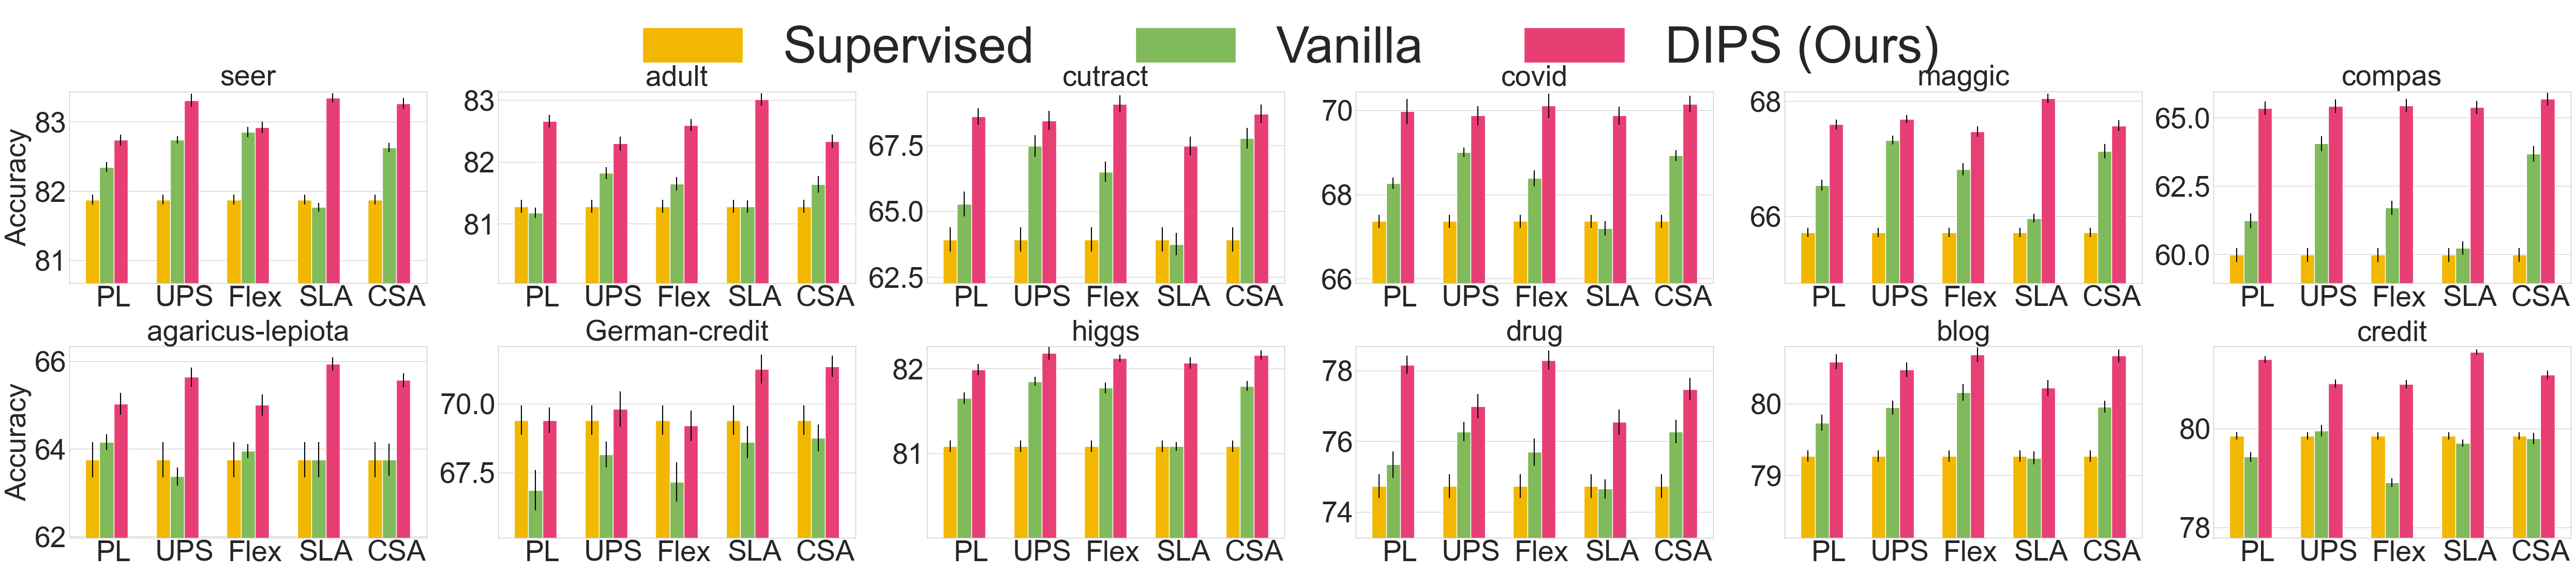

In [5]:
vanilla_res, our_res = plot_results(results_dfs, metainfo_list)